In [1]:
from pathlib import Path

import pandas as pd

from qamsi.utils.data import read_csv
from run import Dataset

DATASET = Dataset.TOPN_US.value(topn=30)

recent = read_csv(".", "cgp_ucb_gmv.csv")
# for i in range(2, 3):
#     ckpt = read_csv(".", f"cgp_ucb_{i}.csv")
#     recent = pd.concat([recent, ckpt], axis=0)

In [2]:
recent

,cgp_ucb
date,
2000-12-29,0.213950
2001-01-31,0.048749
2001-02-28,0.053585
2001-03-30,0.091911
2001-04-30,0.228248
...,...
2024-02-29,0.273826
2024-03-28,0.843224
2024-04-30,0.010655


In [3]:
targets = read_csv("../2_DNK/", "targets.csv", "end_date")
targets

,start_date,vol,naive_vol,shrinkage
end_date,,,,
1982-02-04,1982-01-04,0.007585,0.008035,1.068999e-18
1982-02-05,1982-01-05,0.007278,0.007648,2.944689e-19
1982-02-06,1982-01-06,0.007495,0.007840,0.000000e+00
1982-02-07,1982-01-07,0.007745,0.008088,9.036377e-19
1982-02-08,1982-01-08,0.007631,0.008065,0.000000e+00
...,...,...,...,...
2024-08-24,2024-07-24,0.007225,0.007368,1.591276e-09
2024-08-25,2024-07-25,0.007424,0.007568,3.290100e-09
2024-08-26,2024-07-26,0.007391,0.007510,4.491654e-09


In [4]:
p = recent.merge(targets["shrinkage"], left_index=True, right_index=True).loc[
    "2000-01-01":
]

In [5]:
p

,cgp_ucb,shrinkage
2000-12-29,0.213950,0.348003
2001-02-28,0.053585,0.273096
2001-02-28,0.053585,0.182603
2001-02-28,0.053585,0.161761
2001-04-30,0.228248,0.153469
...,...,...
2024-02-29,0.273826,0.398976
2024-02-29,0.273826,0.379342
2024-02-29,0.273826,0.549615
2024-03-28,0.843224,0.017458


In [6]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(p["shrinkage"], p["cgp_ucb"])

0.3470477395927034

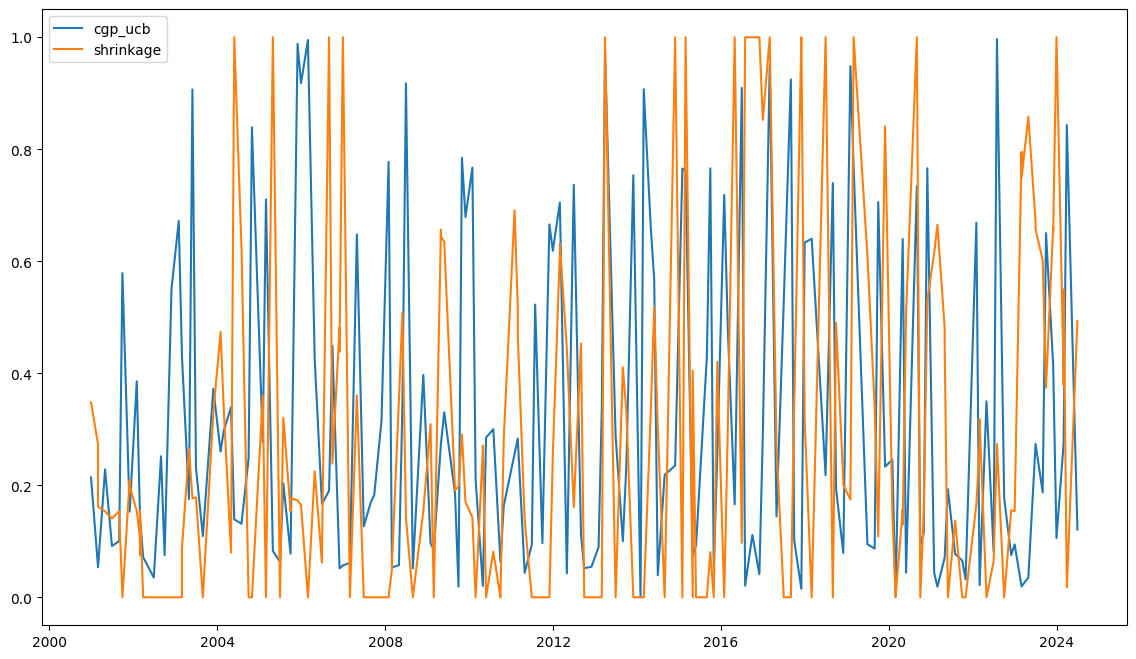

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(p.index, p["cgp_ucb"], label="cgp_ucb")
plt.plot(p.index, p["shrinkage"], label="shrinkage")
plt.legend()
plt.show()

In [8]:
data_df = pd.read_csv(Path("../../data/output") / DATASET.DF_FILENAME)
data_df["date"] = pd.to_datetime(data_df["date"])
data_df = data_df.set_index("date")

In [9]:
data_df.shape

(11324, 152)

In [10]:
data_df = data_df.drop(columns="cgp_ucb")

In [11]:
data_df = data_df.merge(recent, how="left", left_index=True, right_index=True)
data_df.shape

(11324, 152)

In [12]:
data_df.columns

Index(['10078', '10104', '10107', '10147', '10401', '10604', '11042', '11081',
       '11308', '11471',
       ...
       'avg_vol', 'ewma', 'lw_shrinkage', 'momentum_feature', 'universe_vol',
       'lagged_target', 'target_rolling_mean', 'target_rolling_vol', 'trace',
       'cgp_ucb'],
      dtype='object', length=152)

In [13]:
data_df.to_csv(Path("../../data/output") / DATASET.DF_FILENAME)